In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = ['sadness', 'happiness', 'fear', 'anger', 'surprise', 'disgust']
y = np.random.rand(1,6) * 100
y = y.round()
y[0]

array([60., 16.,  7., 75., 19., 63.])

In [9]:
data = pd.read_csv('combined_data.csv')
data = data.grade
data

0                                              Happiness.
1                                                Sadness.
2                                                Sadness.
3                                                  Anger.
4                                                Disgust.
                              ...                        
3636                                              Disgust
3637                                                 Love
3638    Passion. (This word encompasses all of the lis...
3639                                              Sadness
3640                              Empowerment - happiness
Name: grade, Length: 3641, dtype: object

In [10]:
emots_list = ['sadness', 'happiness', 'fear', 'anger', 'surprise', 'disgust']

In [20]:
teset_dict = {key:0 for i, key in enumerate(emots_list)}
max(teset_dict, key=teset_dict.get)

'sadness'

In [22]:
for idx, row in data.iteritems():
    count_of_emots = {key:0 for key in emots_list}
    for emot in emots_list:
        count_of_emots[emot] = row.lower().count(emot)
    highest_emot = max(count_of_emots, key=count_of_emots.get)
    data.iloc[idx] = highest_emot
    if len(row) > 20:
        print(row.lower())
        print('----------')
        print(data.iloc[idx])
        print('----------')
    #if idx==20: break

/var/folders/mx/q84y7s0d107182d1vknn_rmh0000gn/T/ipykernel_3215/524677151.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in data.iteritems():


In [23]:
for key, ele in data.items():
    print(key, ele)

0 happiness
1 sadness
2 sadness
3 anger
4 disgust
5 happiness
6 sadness
7 sadness
8 sadness
9 fear
10 sadness
11 anger
12 anger
13 surprise
14 sadness
15 disgust
16 happiness
17 anger
18 sadness
19 disgust
20 anger
21 anger
22 sadness
23 anger
24 happiness
25 sadness
26 disgust
27 anger
28 happiness
29 anger
30 happiness
31 sadness
32 sadness
33 disgust
34 sadness
35 sadness
36 surprise
37 fear
38 happiness
39 happiness
40 sadness
41 sadness
42 anger
43 happiness
44 happiness
45 happiness
46 anger
47 disgust
48 sadness
49 disgust
50 anger
51 sadness
52 sadness
53 disgust
54 disgust
55 happiness
56 fear
57 anger
58 sadness
59 disgust
60 sadness
61 happiness
62 sadness
63 sadness
64 disgust
65 disgust
66 disgust
67 sadness
68 disgust
69 disgust
70 anger
71 anger
72 anger
73 disgust
74 happiness
75 happiness
76 disgust
77 anger
78 sadness
79 sadness
80 happiness
81 happiness
82 anger
83 anger
84 disgust
85 happiness
86 sadness
87 sadness
88 sadness
89 happiness
90 happiness
91 happiness
9

In [28]:
print(data.value_counts())
dict(data.value_counts())

sadness      1310
happiness     787
anger         722
disgust       662
fear           93
surprise       67
Name: grade, dtype: int64


{'sadness': 1310,
 'happiness': 787,
 'anger': 722,
 'disgust': 662,
 'fear': 93,
 'surprise': 67}

In [34]:
import seaborn as sns

In [44]:
palette = sns.color_palette()
palette

[(0.0, 0.4196078431372549, 0.6431372549019608),
 (1.0, 0.5019607843137255, 0.054901960784313725),
 (0.6705882352941176, 0.6705882352941176, 0.6705882352941176),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (0.37254901960784315, 0.6196078431372549, 0.8196078431372549),
 (0.7843137254901961, 0.3215686274509804, 0.0),
 (0.5372549019607843, 0.5372549019607843, 0.5372549019607843),
 (0.6352941176470588, 0.7843137254901961, 0.9254901960784314),
 (1.0, 0.7372549019607844, 0.4745098039215686),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529)]

In [38]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [51]:
from matplotlib.colors import Colormap

In [53]:
cmap = Colormap('tab20')


In [60]:
len(cmap)

TypeError: object of type 'Colormap' has no len()

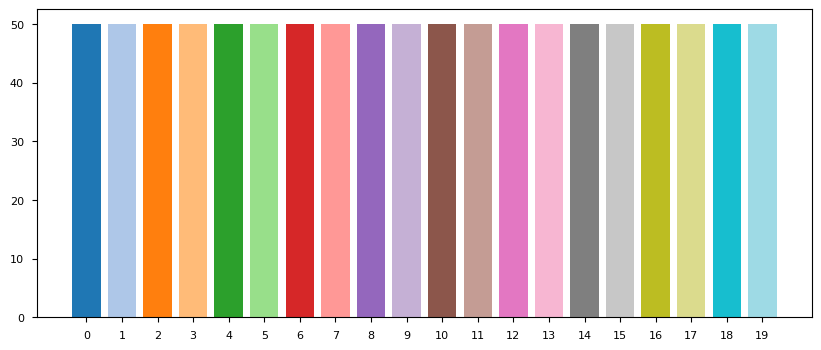

In [80]:
colormap = plt.cm.tab20(np.linspace(0, 1, 20))
#colormap = plt.cm.Set1(np.linspace(0, 1, 20))
colors = [colormap[i] for i in range(20)]#(, colormap[6], colormap[8], colormap[12], colormap[14], colormap[16]]
fig, ax = plt.subplots(figsize = (10,4))
ax.bar([i for i in range(20)], [50 for i in range(20)], color=colors)
ax.set_xticks([i for i in range(20)])
plt.show()

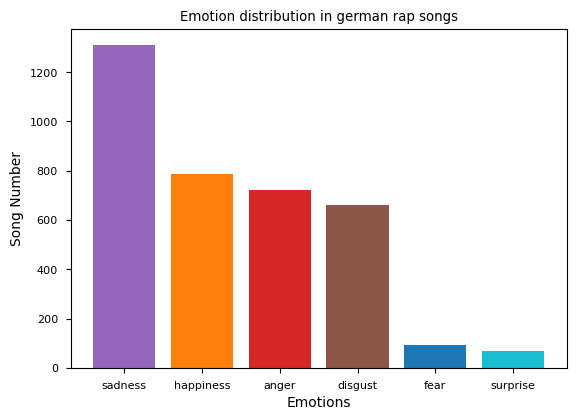

In [83]:
# Define bar colors
# colors are wrong right now
#plt.style.use('tableau-colorblind10')
fin_colors = [colors[9],colors[3], colors[7], colors[11], colors[1], colors[19]]
fin_colors = [colors[8],colors[2], colors[6], colors[10], colors[0], colors[18]]

# Create barplot
plt.bar(dict(data.value_counts()).keys(), dict(data.value_counts()).values(), color=fin_colors)

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Song Number')
plt.title('Emotion distribution in german rap songs')

# Show plot
plt.show()


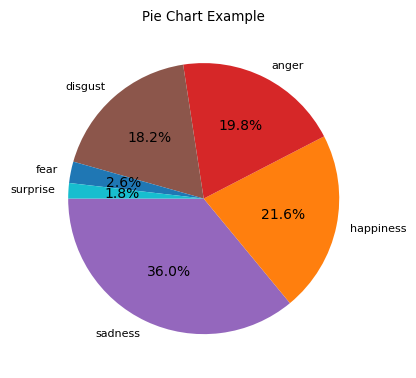

In [84]:
labels = dict(data.value_counts()).keys()
sizes = dict(data.value_counts()).values()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=fin_colors, labeldistance=1.1)

# Set the plot title
plt.title('Pie Chart Example')

# Show the plot
plt.show()